In [84]:
import scanpy as sc
import pandas as pd
import numpy as np

import math #計算combinations
import random #做隨機抽樣分布

import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
healthy = sc.read_h5ad("GSE165080_healthy.h5ad")

# 開始處理cell dispersion

我需要先把每個人的部分個別提取出來，最後再將每個人的NK提取出來做cell dispersion

In [5]:
healthy

AnnData object with n_obs × n_vars = 46160 × 27426
    obs: 'Age', 'Gender', 'BioSample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type_l1', 'cell_type_l2', 'cell_type_l3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'BioSample_colors', 'cell_type_l1_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [6]:
BioSample = healthy.obs.BioSample

personal = {}
personal_df = {}
for i in BioSample:
    if i not in personal:
        personal[i] = healthy[healthy.obs["BioSample"] == i, :]
        personal_df[i] = healthy[healthy.obs["BioSample"] == i, :]
len(personal)

11

In [7]:
for i in personal:
    print(i)

SAMN17379694
SAMN17379721
SAMN17379592
SAMN17379590
SAMN17379695
SAMN17379693
SAMN17379698
SAMN17379697
SAMN17379696
SAMN17379671
SAMN17379591


In [8]:
personal["SAMN17379721"].X

ArrayView([[-0.04113887, -0.02130056, -0.08352882, ..., -0.02508638,
            -0.02123656, -0.00597406],
           [-0.04731227, -0.00735563, -0.04381714, ...,  0.00101563,
            -0.01133961, -0.01024567],
           [-0.05402926, -0.00711253, -0.07180765, ..., -0.01154446,
            -0.01523731, -0.01000294],
           ...,
           [-0.04257759, -0.00480372, -0.01110002, ...,  0.01734045,
            -0.00591701, -0.01130882],
           [-0.04313654, -0.01091146, -0.04265317, ..., -0.00051715,
            -0.01226112, -0.0092813 ],
           [-0.03972478, -0.02541457, -0.09701156, ..., -0.03358878,
            -0.0244071 , -0.00469432]], dtype=float32)

In [9]:
personal["SAMN17379721"].obs.cell_type_l1

NK_1 = personal["SAMN17379721"][personal["SAMN17379721"].obs["cell_type_l1"] == "NK", :]
NK_2 = personal["SAMN17379694"][personal["SAMN17379694"].obs["cell_type_l1"] == "NK", :]
NK_1

View of AnnData object with n_obs × n_vars = 267 × 27426
    obs: 'Age', 'Gender', 'BioSample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type_l1', 'cell_type_l2', 'cell_type_l3'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'BioSample_colors', 'cell_type_l1_colors', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [106]:
NK_1.obs

,Age,Gender,BioSample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type_l1,cell_type_l2,cell_type_l3
AACACGTGTGACGGTA-1,51,male,SAMN17379721,872,872,1459.0,211.0,14.461960,17,NK,NK,NK_2
AACCATGAGGAATGGA-1,51,male,SAMN17379721,1733,1733,3579.0,137.0,3.827885,4,NK,NK,NK_2
AACTCCCAGCTCAACT-1,51,male,SAMN17379721,1652,1652,3342.0,145.0,4.338719,4,NK,NK,NK_2
AAGCCGCCACCCAGTG-1,51,male,SAMN17379721,999,999,1650.0,166.0,10.060606,17,NK,NK,NK_2
AAGGCAGTCTCCAGGG-1,51,male,SAMN17379721,1513,1513,3504.0,76.0,2.168950,4,NK,NK,NK_2
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCCATGTAAGA-1,51,male,SAMN17379721,1514,1514,3438.0,131.0,3.810355,4,NK,NK,NK_2
TTTATGCGTTGTCGCG-1,51,male,SAMN17379721,666,666,984.0,109.0,11.077235,17,NK,NK,NK_2
TTTCCTCTCACAGGCC-1,51,male,SAMN17379721,1151,1151,1891.0,233.0,12.321523,17,NK,NK,NK_2
TTTGCGCGTAAAGTCA-1,51,male,SAMN17379721,2142,2142,5499.0,179.0,3.255137,4,NK,NK,NK_2


In [11]:
NK_2.obs

,Age,Gender,BioSample,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type_l1,cell_type_l2,cell_type_l3
AAACCTGCAATAAGCA-1,34,female,SAMN17379694,1487,1487,2865.0,371.0,12.949389,16,NK,NK,NK_2
AAACCTGCAGCCTTTC-1,34,female,SAMN17379694,1780,1780,3634.0,247.0,6.796918,16,NK,NK,NK_2
AAACCTGCAGTCAGAG-1,34,female,SAMN17379694,2364,2364,5104.0,223.0,4.369122,16,NK,NK,NK_2
AAACCTGGTGATGCCC-1,34,female,SAMN17379694,1619,1619,3220.0,262.0,8.136645,16,NK,NK,NK_2
AAACGGGGTCATGCCG-1,34,female,SAMN17379694,1984,1984,4308.0,159.0,3.690808,16,NK,NK,NK_2
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCCAGCGTTCG-1,34,female,SAMN17379694,4010,4008,11106.0,257.0,2.314065,31,NK,NK Proliferating,NK Proliferating
TTTGGTTCATGCCTTC-1,34,female,SAMN17379694,2005,2005,4192.0,228.0,5.438931,16,NK,NK,NK_2
TTTGTCAAGGACTGGT-1,34,female,SAMN17379694,2227,2227,4805.0,238.0,4.953174,16,NK,NK,NK_1
TTTGTCAAGTAGGCCA-1,34,female,SAMN17379694,2273,2272,5118.0,234.0,4.572098,16,NK,NK,NK_2


In [12]:
NK_2.n_vars

27426

In [74]:
# 將30~50個不同的cell放入新的dataframe中，以便後續進行計算
def renew_sampling_list(cell_type):
    # 隨機抽樣，抽取30~50個不同的cell之後要做cell dispersion的計算
    sampling = []
    for i in range(0, 50):
        # 挑出cell的位置
        cell = random.randrange(0, cell_type.n_obs)
        while cell in sampling:
            cell = random.randrange(0, cell_type.n_obs)
        sampling.append(cell)
    
    # 紀錄30~50個cell * gene的資料
    cell_dispersion = []
    # 先將 cell type 變成dataframe後，做 transpose 之後才能夠把挑選出來的 genes 放進去
    cell_type_transpose = pd.DataFrame(data = cell_type.X, columns = cell_type.var.index.values)
    # 做50次的隨機抽樣並且將結果
    for i in range(0, 50):
        # 將dataframe塞進去新的list中
        cell_dispersion.append(cell_type_transpose.loc[sampling[i]])
    #將list轉成dataframe的格式
    cell_dispersion = np.array(cell_dispersion)
    
    return cell_dispersion

# 將某一個人的 cell type 提取出來做cell dispersion, 之後再拿其他人的去做比較 
# 要給numpy array的格式
def create_distance_matrix(data):
    # must be two dimension array, so need to change dataframe into array
    ncells = data.shape[0]
    
    index1 = np.concatenate(tuple(np.repeat(i, ncells) for i in range(0,ncells)), axis =None)
    index2 = np.tile(np.arange(0, ncells, 1), ncells)
    
    X = data[:, index1]
    Y = data[:, index2]
    
    out = np.sqrt(np.sum((X - Y) * (X - Y), axis = 0))
    distance_matrix = np.reshape(out, (ncells, ncells))
    
    return distance_matrix

# 計算離散程度，將n*n計算過後的matrix丟進來
def calculate_dispersion(distance):
    # np.triu只取上三角，其餘的都變成0
    dispersion = np.triu(distance).sum()/np.count_nonzero(np.triu(distance))
    return dispersion

In [50]:
# 上面目前進度 : renew_sampling_list，每次重新計算一個50 cells *  genes的array
#               create_distance_matrix，計算cell dispersion，最後得到的結果是cell * cell 的 matrix

In [114]:
dispersion_personal = []
for i in personal:
    dispersion = []
    NK = personal[i][personal[i].obs.cell_type_l1 == "NK", :]
    for i in range(0,1000):
        # 取得sampling的dataframe
        cell_dispersion_NK = renew_sampling_list(NK)
        # 計算 cell * cell distance
        distance_matrix_NK = create_distance_matrix(cell_dispersion_NK)
        # 取得此次抽樣的dispersion
        dispersion.append(calculate_dispersion(distance_matrix_NK))
    dispersion_personal.append(dispersion)

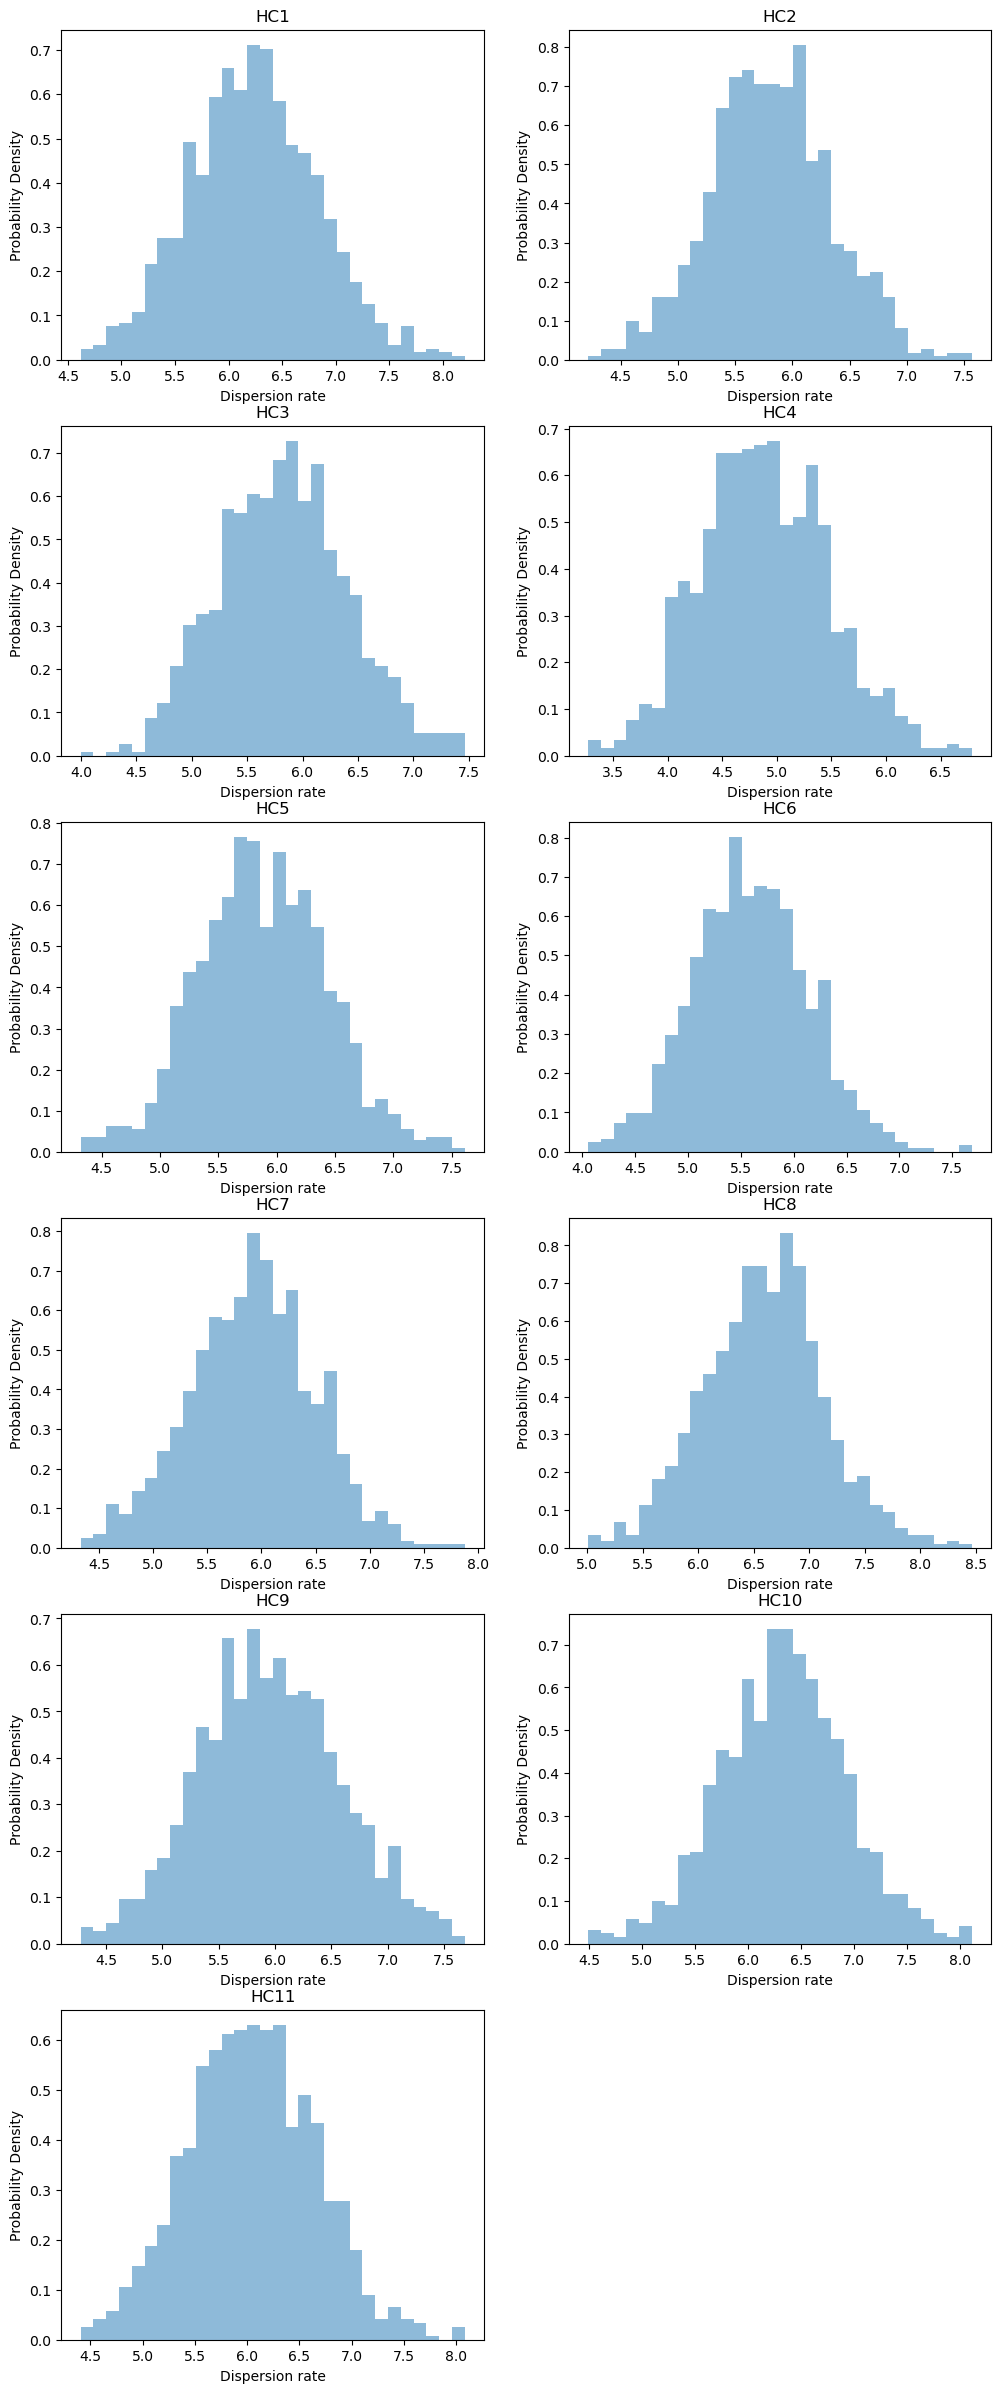

In [161]:
fig, axs = plt.subplots(6,2, figsize = (12, 30))
for i in range(0,len(dispersion_personal)):
    row = i // 2
    col = i % 2
    axs[row, col].hist(dispersion_personal[i], bins=30, density=True, alpha=0.5, label = "HC")
    axs[row, col].set_title(f'HC{i+1}')
    axs[row, col].set_xlabel('Dispersion rate')
    axs[row, col].set_ylabel('Probability Density')
    
axs[5, 1].axis('off')


# 將圖形保存為PNG文件
plt.savefig('dispersion.png', dpi=900)

Text(0, 0.5, 'Probability Density')

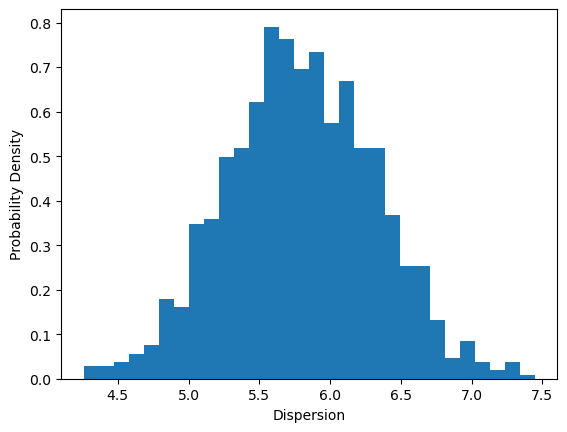

In [107]:
# 繪製直方圖
#plt.hist(dispersion_NK, bins=30, density=True)
#plt.xlabel('Dispersion')
#plt.ylabel('Probability Density')

In [113]:
"""# 取得1000次抽樣的離散程度
dispersion_NK_1 = []
for i in range(0,1000):
    # 取得sampling的dataframe
    cell_dispersion_NK_1 = renew_sampling_list(NK_1)
    # 計算 cell * cell distance
    distance_matrix_NK_1 = create_distance_matrix(cell_dispersion_NK_1)
    # 取得此次抽樣的dispersion
    dispersion_NK_1.append(calculate_dispersion(distance_matrix_NK_1))"""